In [7]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns

%matplotlib inline

In [4]:
#df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')
df_flights = pd.read_csv('flights.csv')

In [5]:
df_flights.shape

(162049, 16)

In [9]:
df_flights[:5]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


In [6]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
year         162049 non-null int64
month        162049 non-null int64
day          162049 non-null int64
dep_time     161192 non-null float64
dep_delay    161192 non-null float64
arr_time     161061 non-null float64
arr_delay    160748 non-null float64
carrier      162049 non-null object
tailnum      161801 non-null object
flight       162049 non-null int64
origin       162049 non-null object
dest         162049 non-null object
air_time     160748 non-null float64
distance     162049 non-null int64
hour         161192 non-null float64
minute       161192 non-null float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB


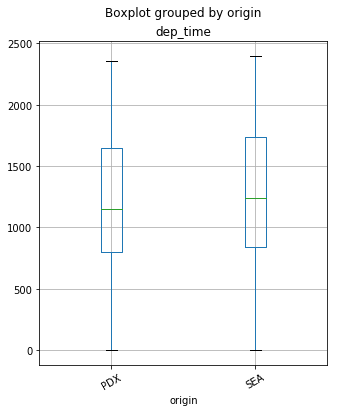

In [8]:
df_flights.boxplot('dep_time', 'origin', rot = 30, figsize=[5,6])

In [9]:
cat_df_flights = df_flights.select_dtypes(include=['object']).copy()

In [10]:
cat_df_flights[:6]

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC
5,DL,N806DN,SEA,DTW


### data 안에 null data가 있는지 확인하기

In [30]:
cat_df_flights.isna().sum()

carrier      0
tailnum    248
origin       0
dest         0
dtype: int64

In [32]:
cat_df_flights.isna().values.sum()

248

In [38]:
cat_df_flights['tailnum'].value_counts().index[0]

'N223AG'

In [42]:
pd.Series.values?

### tailnum 컬럼에 비어있는 곳을 가장 빈도수가 많은 값으로 채운다

In [43]:
cat_df_flights = cat_df_flights.fillna(cat_df_flights['tailnum'].value_counts().index[0])

In [44]:
cat_df_flights['tailnum'].value_counts()

N223AG    1003
N218AG     749
N219AG     744
N614AS     738
N611AS     723
N224AG     713
N607AS     708
N619AS     696
N613AS     694
N644AS     691
N217AG     689
N609AS     685
N622AS     678
N612AS     678
N615AS     675
N625AS     671
N626AS     668
N216AG     668
N225AG     664
N215AG     644
N627AS     644
N618AS     634
N435AS     584
N440AS     567
N318AS     563
N423AS     558
N431AS     554
N409AS     553
N442AS     549
N419AS     544
          ... 
N7718B       1
N555AA       1
N426AA       1
N470AA       1
N7706A       1
N5FDAA       1
N302DQ       1
N814NW       1
N737US       1
N190DN       1
N468AA       1
N835MH       1
N710UW       1
N330NB       1
N664UA       1
N347AA       1
N456AA       1
N557AA       1
N528AA       1
N57863       1
N5ECAA       1
N12114       1
N188DN       1
N5DFAA       1
N905AW       1
N198DN       1
N75854       1
N199DN       1
N508AA       1
N573AA       1
Name: tailnum, Length: 3022, dtype: int64

### 제대로 값이 반영됐는지 확인

In [46]:
cat_df_flights.isna().values.sum()

0

In [48]:
cat_df_flights['carrier'].value_counts().count()

11

In [77]:
import matplotlib
import matplotlib.pyplot as plt

# 한글을 지원하는 글씨체로 설정
#matplotlib.rcParams['font.family'] = ['NanumGothic']
matplotlib.font_manager.FontProperties(fname="/Library/Fonts/Nanum Gothic.otf")
matplotlib.rc('font', family = "/Library/Fonts/Nanum Gothic.otf")

In [78]:
carrier_count = cat_df_flights['carrier'].value_counts()

In [79]:
sns.set(style='darkgrid')

Text(0.5, 0, '항공사')

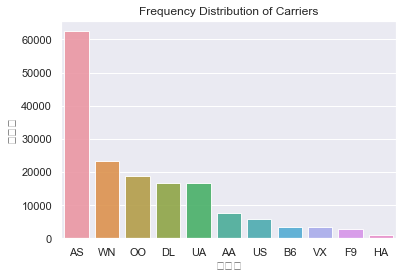

In [81]:
sns.barplot(carrier_count.index, carrier_count.values, alpha = 0.9)
plt.title(u'Frequency Distribution of Carriers')
plt.ylabel('빈도수')
plt.xlabel('항공사')

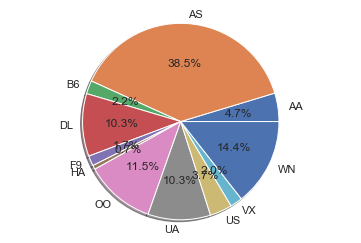

In [82]:
labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
counts = cat_df_flights['carrier'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()


In [83]:
sizes

[7586, 62460, 3540, 16716, 2698, 1095, 18710, 16671, 5946, 3272, 23355]

In [87]:
labels



['AA', 'AS', 'B6', 'DL', 'F9', 'HA', 'OO', 'UA', 'US', 'VX', 'WN']

In [88]:
counts

AS    62460
WN    23355
OO    18710
DL    16716
UA    16671
AA     7586
US     5946
B6     3540
VX     3272
F9     2698
HA     1095
Name: carrier, dtype: int64

In [92]:
counts.index

Index(['AS', 'WN', 'OO', 'DL', 'UA', 'AA', 'US', 'B6', 'VX', 'F9', 'HA'], dtype='object')

In [93]:
replace_map = {'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4,
                                  'F9': 5, 'HA': 6, 'OO': 7 , 'UA': 8 , 'US': 9,'VX': 10,'WN': 11}}


In [94]:
replace_map

{'carrier': {'AA': 1,
  'AS': 2,
  'B6': 3,
  'DL': 4,
  'F9': 5,
  'HA': 6,
  'OO': 7,
  'UA': 8,
  'US': 9,
  'VX': 10,
  'WN': 11}}

In [95]:
replace_map_comp = {'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)


{'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4, 'F9': 5, 'HA': 6, 'OO': 7, 'UA': 8, 'US': 9, 'VX': 10, 'WN': 11}}


In [96]:
cat_df_flights_replace = cat_df_flights.copy()

In [97]:
cat_df_flights_replace.replace(replace_map_comp, inplace=True)

print(cat_df_flights_replace.head())

   carrier tailnum origin dest
0        2  N508AS    PDX  ANC
1        9  N195UW    SEA  CLT
2        8  N37422    PDX  IAH
3        9  N547UW    PDX  CLT
4        2  N762AS    SEA  ANC


In [111]:
cat_df_flights_replace.dtypes

carrier     int64
tailnum    object
origin     object
dest       object
dtype: object

In [113]:
cat_df_flights_lc = cat_df_flights.copy()
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].astype('category')
cat_df_flights_lc['origin'] = cat_df_flights_lc['origin'].astype('category')                                                              
cat_df_flights_lc.dtypes

carrier    category
tailnum      object
origin     category
dest         object
dtype: object

In [114]:
import time
%timeit cat_df_flights.groupby(['origin','carrier']).count() #DataFrame with object dtype columns


22.4 ms ± 367 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [115]:
%timeit cat_df_flights_lc.groupby(['origin','carrier']).count() #DataFrame with category dtype columns

13.6 ms ± 198 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Note that the DataFrame with category dtype is much faster

## Label Encoding
 - .cat.codes를 사용하여 가능

In [117]:
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].cat.codes

In [123]:
cat_df_flights_lc[:5]

,carrier,tailnum,origin,dest
0,1,N508AS,PDX,ANC
1,8,N195UW,SEA,CLT
2,7,N37422,PDX,IAH
3,8,N547UW,PDX,CLT
4,1,N762AS,SEA,ANC


In [124]:
print(cat_df_flights_lc.dtypes)

carrier        int8
tailnum      object
origin     category
dest         object
dtype: object


In [125]:
cat_df_flights_specific = cat_df_flights.copy()
cat_df_flights_specific['US_code'] = np.where(cat_df_flights_specific['carrier'].str.contains('US'), 1, 0)

cat_df_flights_specific.head()

,carrier,tailnum,origin,dest,US_code
0,AS,N508AS,PDX,ANC,0
1,US,N195UW,SEA,CLT,1
2,UA,N37422,PDX,IAH,0
3,US,N547UW,PDX,CLT,1
4,AS,N762AS,SEA,ANC,0


###  can achieve the same label encoding using scikit-learn's LabelEncoder

In [126]:
cat_df_flights_sklearn = cat_df_flights.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
cat_df_flights_sklearn['carrier_code'] = lb_make.fit_transform(cat_df_flights['carrier'])

cat_df_flights_sklearn.head() #Results in appending a new column to df

,carrier,tailnum,origin,dest,carrier_code
0,AS,N508AS,PDX,ANC,1
1,US,N195UW,SEA,CLT,8
2,UA,N37422,PDX,IAH,7
3,US,N547UW,PDX,CLT,8
4,AS,N762AS,SEA,ANC,1


## One-Hot Encoding
 - Carrier별로 0, 1만 갖는 새로운 컬럼을 만들어보자.
 - 이렇기 위해서는 Carrier별로 새로운 컬럼이 생성되며, 해당 컬럼값이 Carrier를 의미한다고 보면 됨
 - scikit-learn also supports one hot encoding via "LabelBinarizer" and "OneHotEncoder" in its preprocessing module

In [135]:
cat_df_flights_onehot = cat_df_flights.copy()
cat_df_flights_onehot = pd.get_dummies(cat_df_flights_onehot, columns=['carrier'], prefix = ['carrier'])

cat_df_flights_onehot[:5]

,tailnum,origin,dest,carrier_AA,carrier_AS,carrier_B6,carrier_DL,carrier_F9,carrier_HA,carrier_OO,carrier_UA,carrier_US,carrier_VX,carrier_WN
0,N508AS,PDX,ANC,0,1,0,0,0,0,0,0,0,0,0
1,N195UW,SEA,CLT,0,0,0,0,0,0,0,0,1,0,0
2,N37422,PDX,IAH,0,0,0,0,0,0,0,1,0,0,0
3,N547UW,PDX,CLT,0,0,0,0,0,0,0,0,1,0,0
4,N762AS,SEA,ANC,0,1,0,0,0,0,0,0,0,0,0


In [136]:
cat_df_flights_onehot_sklearn = cat_df_flights.copy()

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(cat_df_flights_onehot_sklearn['carrier'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_results_df.head())


   AA  AS  B6  DL  F9  HA  OO  UA  US  VX  WN
0   0   1   0   0   0   0   0   0   0   0   0
1   0   0   0   0   0   0   0   0   1   0   0
2   0   0   0   0   0   0   0   1   0   0   0
3   0   0   0   0   0   0   0   0   1   0   0
4   0   1   0   0   0   0   0   0   0   0   0


In [137]:
result_df = pd.concat([cat_df_flights_onehot_sklearn, lb_results_df], axis=1)

print(result_df.head())

  carrier tailnum origin dest  AA  AS  B6  DL  F9  HA  OO  UA  US  VX  WN
0      AS  N508AS    PDX  ANC   0   1   0   0   0   0   0   0   0   0   0
1      US  N195UW    SEA  CLT   0   0   0   0   0   0   0   0   1   0   0
2      UA  N37422    PDX  IAH   0   0   0   0   0   0   0   1   0   0   0
3      US  N547UW    PDX  CLT   0   0   0   0   0   0   0   0   1   0   0
4      AS  N762AS    SEA  ANC   0   1   0   0   0   0   0   0   0   0   0


## Binary Encoding
 - category_encoders library

In [141]:
cat_df_flights_ce = cat_df_flights.copy()

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['carrier'])
df_binary = encoder.fit_transform(cat_df_flights_ce)

df_binary.head()


,carrier_0,carrier_1,carrier_2,carrier_3,carrier_4,tailnum,origin,dest
0,0,0,0,0,1,N508AS,PDX,ANC
1,0,0,0,1,0,N195UW,SEA,CLT
2,0,0,0,1,1,N37422,PDX,IAH
3,0,0,0,1,0,N547UW,PDX,CLT
4,0,0,0,0,1,N762AS,SEA,ANC


In [140]:
!pip install category_encoders

    100% |████████████████████████████████| 92kB 1.3MB/s ta 0:00:011


In [142]:
cat_df_flights_ce[:5]

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC


In [144]:
dummy_df_age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})
dummy_df_age['start'], dummy_df_age['end'] = zip(*dummy_df_age['age'].map(lambda x: x.split('-')))

In [145]:
dummy_df_age

,age,start,end
0,0-20,0,20
1,20-40,20,40
2,40-60,40,60
3,60-80,60,80


In [146]:
def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

dummy_df_age['age_mean'] = dummy_df_age['age'].apply(lambda x: split_mean(x))



In [147]:
dummy_df_age

,age,start,end,age_mean
0,0-20,0,20,10.0
1,20-40,20,40,30.0
2,40-60,40,60,50.0
3,60-80,60,80,70.0
